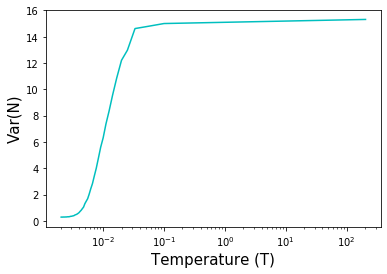

In [1]:
# Problem 3 Monte-Carlo Lattice Gas

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, randint, random

# total number of monte carlo steps
moves = 4000

#Beta values
n_t = 50
B = np.linspace(10**(-4),10,n_t)

#Number of sites in ring
L = 64

#Constant
mu = 1
k = 1.38*10**(-23)

#hold 1 or 0 value at each site
N_array = np.zeros(L)

#Fills N_array with 1s or 0s with equal probability
for i in range(L-1):
    if np.random.random()<0.5:
        N_array[i] = 0
    else:
        N_array[i] = 1

# total number of occupied states at each monte carlo step
N_total = np.zeros(moves)

#Give initial value to base calculations off of. Finds N_total from inital configuration
N_total[0] = np.sum(N_array)

#intialiaze energy array to hold total energy at each step
E = np.zeros(moves)

#Initial energy after random configuration of 1s and 0s is chosen
E[0] = -mu*N_total[0]

def Monte_Carlo(E,moves,L,mu,N_array,B):

    for j in range(1,moves):
        x = np.random.randint(0,L-1) #choose random site location
        if N_array[x] == 1: # site is occupied
            N_array[x] = 0  #flip it --- lowers energy
            N_total[j] = np.sum(N_array)
            E[j] = -mu*N_total[j]
            prob = np.exp(-(E[j]-E[j-1])*B) #evaluate probability
            if np.random.random()<prob:  #if probability is greater than threshold, flip to 0
                N_array[x] = 0 
                N_total[j] = np.sum(N_array)
                E[j] = -mu*N_total[j] #E[j-1] + 1
            else:                 #else return it back to 1
                N_array[x] = 1
                N_total[j] = np.sum(N_array)
                E[j] = -mu*N_total[j] #E[j-1]
        else:                    #site is not occupied
            N_array[x] = 1      #stays 0 as does no increase energy
            N_total[j] = np.sum(N_array)
            E[j] = -mu*N_total[j] #E[j-1] - 1
    return np.var(N_total) #[j]            #Returns total number of occcupied states at end of simulation


trials = 100
#Creates 2D array to store *trials* number of varN values for each beta value, where the trials are averaged
#over to produce a smooth plot
N_E = np.zeros((trials,n_t))

#Fill array
for k in range(0,n_t):
    for i in range(0,trials):
        N_E[i,k] = Monte_Carlo(E,moves,L,mu,N_array,B[k])

#Reduce 2D array to 1D by averaging over the trials --- each column --- for each beta
A = np.mean(N_E, axis=0)
plt.xlabel('Temperature (T)', size = 15)
plt.ylabel('Var(N)', size = 15)
plt.semilogx(1/(B*k), A ,color = 'c')


